In [185]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Read the CSV file into a DataFrame
dgl_16 = pd.read_csv('dgl_k16.csv', sep=',', header=None)
dgl_16.columns = ['time', 'model', 'nodes', 'vertices', 'features', 'density', 'runtime', 'method', 'bs']

dgl_128 = pd.read_csv('dgl_k128.csv', sep=',', header=None)
dgl_128.columns = ['time', 'model', 'nodes', 'vertices', 'features', 'density', 'runtime', 'method', 'bs']

dgl = pd.concat([dgl_16, dgl_128], ignore_index=True)
dgl['model'] = dgl['model'].str.upper()
# dgl = dgl[dgl['method'].isin(['NORM', 'DIST_SAMPLE'])]
dgl = dgl[dgl['method'].isin(['DIST_SAMPLE'])]
dgl['edges'] = (dgl['vertices'] * dgl['vertices'] * dgl['density']).astype(int)
replace_dgl = {171798691: 171798692, 109951162: 109951163} # hack
dgl['edges'] = dgl['edges'].replace(replace_dgl)
dgl['method'] = dgl['method'].replace({'NORM': 'DGL Single', 'DIST_SAMPLE': 'DistDGL'})
dgl.drop(columns=['density', 'time', 'bs'], inplace=True)
dgl

,model,nodes,vertices,features,runtime,method,edges
2,AGNN,1,131072,16,3.184674,DistDGL,171798692
5,GAT,1,131072,16,3.416222,DistDGL,171798692
8,VA,1,131072,16,3.266527,DistDGL,171798692
11,AGNN,1,1048576,16,67.016995,DistDGL,109951163
14,GAT,1,1048576,16,67.008907,DistDGL,109951163
...,...,...,...,...,...,...,...
275,AGNN,32,2097152,128,6.498382,DistDGL,439804651
277,VA,32,2097152,128,6.624362,DistDGL,439804651
279,AGNN,32,131072,128,0.603121,DistDGL,171798692
281,GAT,32,131072,128,0.847037,DistDGL,171798692


In [186]:
ours_single = pd.read_csv('single.csv', sep='\t', header=None)
ours_single.columns = ['model', 'task', 'nodes', 'dtype', 'vertices', 'edges', 'layers', 'features', 'runtime', 'std']
ours_single['method'] = 'Ours Single'
ours_single['model'] = ours_single['model'].replace({'unified_single_VA': 'VA', 'unified_single_GAT': 'GAT', 'unified_single_AGNN': 'AGNN'})

ours_distr = pd.read_csv('strong.csv', sep='\t', header=None)
ours_distr.columns = ['model', 'task', 'nodes', 'dtype', 'vertices', 'edges', 'layers', 'features', 'runtime', 'std']
ours_distr['method'] = 'Ours Dist'
ours_distr['model'] = ours_distr['model'].replace({'unified_distr_VA': 'VA', 'unified_distr_GAT': 'GAT', 'unified_distr_AGNN': 'AGNN'})

ours = pd.concat([ours_single, ours_distr], ignore_index=True)
ours['runtime'] = ours['runtime'] / 1e3 # ms to s
ours = ours[ours['task'] == 'training']
ours.drop(columns=['task','std', 'dtype', 'layers'], inplace=True)
ours

,model,nodes,vertices,edges,features,runtime,method
5,VA,1,1048576,109951163,16,6.363,Ours Single
7,GAT,1,1048576,109951163,16,13.027,Ours Single
9,VA,1,131072,171798692,16,2.741,Ours Single
10,AGNN,1,131072,171798692,16,3.349,Ours Single
12,GAT,1,131072,171798692,16,7.946,Ours Single
...,...,...,...,...,...,...,...
258,AGNN,64,2097152,439804651,128,8.094,Ours Dist
259,VA,1,2097152,439804651,128,119.487,Ours Dist
260,AGNN,4,2097152,439804651,128,53.224,Ours Dist
262,GAT,1,2097152,439804651,128,150.310,Ours Dist


In [187]:
data = pd.concat([dgl, ours], ignore_index=True)
data

,model,nodes,vertices,features,runtime,method,edges
0,AGNN,1,131072,16,3.184674,DistDGL,171798692
1,GAT,1,131072,16,3.416222,DistDGL,171798692
2,VA,1,131072,16,3.266527,DistDGL,171798692
3,AGNN,1,1048576,16,67.016995,DistDGL,109951163
4,GAT,1,1048576,16,67.008907,DistDGL,109951163
...,...,...,...,...,...,...,...
265,AGNN,64,2097152,128,8.094000,Ours Dist,439804651
266,VA,1,2097152,128,119.487000,Ours Dist,439804651
267,AGNN,4,2097152,128,53.224000,Ours Dist,439804651
268,GAT,1,2097152,128,150.310000,Ours Dist,439804651


In [188]:
graphs = [(131072,171798692),
          (262144,687194767),
          (1048576,109951163),
          (2097152,439804651)]

def get_col_mar_lst_mfc(algo, model):
	col = "#000000"
	mar = "*"
	lst = "-"
	mfc = "none"

	# Color, Marker
	if model == "GAT":
		col = "#009900"
		mar = "o"
	if model == "VA":
		col = "#990000"
		mar = "d"
	if model == "AGNN":
		col = "#000099"
		mar = "s"

	# Line-style
	if algo == "Ours Single":
		lst = "none"
		mfc = col
	if algo == "Ours Dist":
		lst = "-"
	if algo == "DGL Single":
		lst = "none"
		mfc = col
	if algo == "DistDGL":
		lst = "--"

	return (col, mar, lst, mfc)

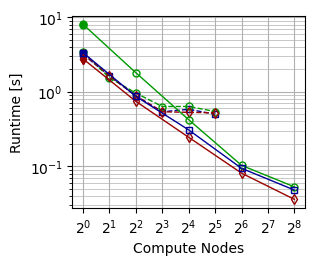

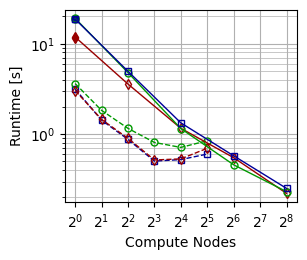

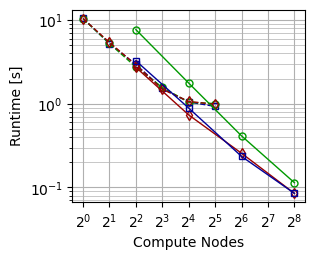

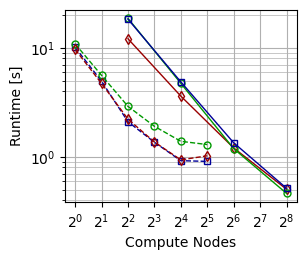

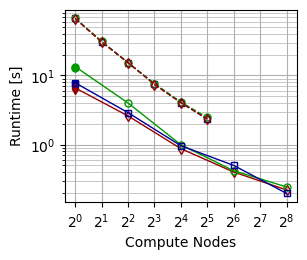

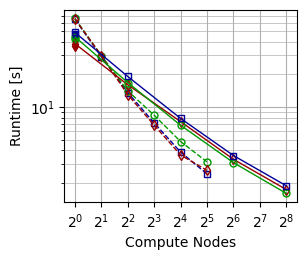

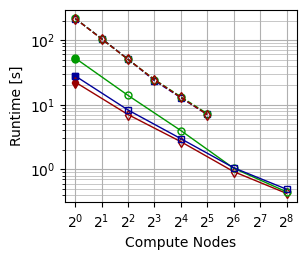

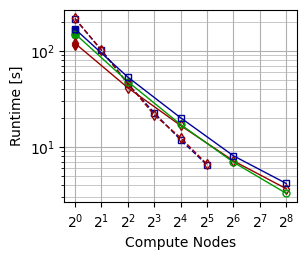

In [189]:

for v, e in graphs:
    for feat in [16, 128]:
        fig, ax = plt.subplots(1, 1, figsize=(3, 2.5))
        for method in data['method'].unique():
            curr_method = data[data['method'] == method]
            for model in curr_method['model'].unique():
                curr_model = curr_method[curr_method['model'] == model]
                cur_data = curr_model[(curr_model['vertices'] == v) & (curr_model['edges'] == e) & (curr_model['features'] == feat)].sort_values(by=['nodes'])
                # print(cur_data)
                # replace duplicated data with median value
                cur_data = cur_data.groupby(cur_data.columns.drop('runtime').tolist()).median().reset_index()
                col, mar, lst, mfc = get_col_mar_lst_mfc(method, model)
                ax.plot(cur_data['nodes'], cur_data['runtime'], label=model, color=col, marker=mar, linestyle=lst, markerfacecolor=mfc, markersize=5, linewidth=1)

        ax.grid(which = "major")
        ax.grid(which = "minor", linewidth = 0.5)
        # Configure x-axis
        ax.set_xscale("log", base = 2)
        ax.set_xlabel("Compute Nodes")
        ax.set_xticks([2**x for x in range(9)])
        # Configure y-axis
        ax.set_yscale("log", base = 10)
        ax.set_ylabel("Runtime [s]")

        plt.savefig("kronecker_strong_scaling_n=%d_k=%d.pdf" % (v, feat))

/tmp/ipykernel_1406/536600362.py:11: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  legend_handles.append(mpatches.Patch(color=col, hatch=mar, linestyle=lst, facecolor=mfc, label=label))
/tmp/ipykernel_1406/536600362.py:11: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "d". Passing invalid values is deprecated since 3.4 and will become an error in 3.8.
  legend_handles.append(mpatches.Patch(color=col, hatch=mar, linestyle=lst, facecolor=mfc, label=label))
/tmp/ipykernel_1406/536600362.py:11: MatplotlibDeprecationWarning: hatch must consist of a string of "*+-./OX\ox|" or None, but found the following invalid values "s". Passing invalid values is deprecated since 3.4 and will become an error in 3.8.
  legend_handles.append(mpatches.Patch(color=col, hatch=mar, linestyle=lst, facecolor=mfc, label=label))


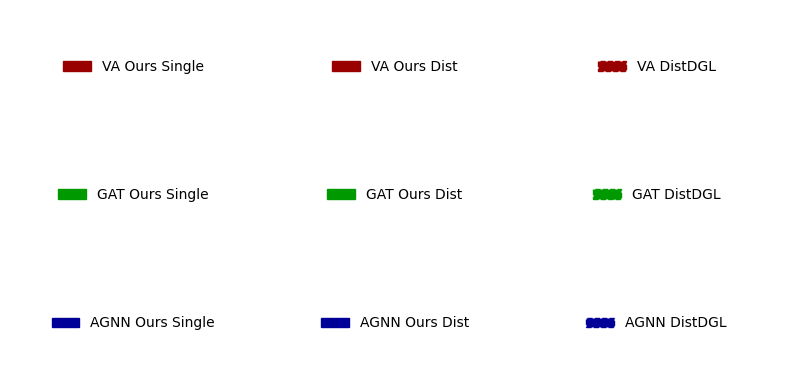

In [192]:
# for global legend
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import itertools
models = ['VA', 'GAT', 'AGNN']
methods = ['Ours Single', 'Ours Dist', 'DistDGL']

legend_handles = []
for model, method in itertools.product(models, methods):
    label = model + ' ' + method
    col, mar, lst, mfc = get_col_mar_lst_mfc(method, model)
    legend_handles.append(Line2D([], [], color=col, marker=mar, linestyle=lst, markerfacecolor=mfc, markersize=5, linewidth=1, label=label))

# Create a figure with multiple axes for legends
fig, axes = plt.subplots(3, 3, figsize=(8, 2))
axes = axes.flatten()

# Iterate over the axes and add legends
for ax, handle in zip(axes, legend_handles):
    ax.axis('off')  # Remove axes and ticks
    ax.legend(handles=[handle], frameon=False, loc='center')

# Show the figure
plt.tight_layout()